<a href="https://colab.research.google.com/github/Cilence-lab/geoinfo/blob/master/Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#from google.colab import files
#img = files.upload()

In [17]:
%pwd

'/content'

## Load libraries 

In [0]:
import rasterio
from rasterio.plot import show
import tensorflow as tf
from google.colab import drive
import fnmatch
import os
import numpy as np


## Install dependencies if packages are not available

In [0]:
#!pip install rasterio

## Mount the folder that contains data

In [13]:
#Access my google drive
drive.mount('data_example')
path = 'data_example/My Drive/Data_example'

Drive already mounted at data_example; to attempt to forcibly remount, call drive.mount("data_example", force_remount=True).


In [0]:
#Unmount the drive
#!fusermount -u data_example

## Get File list

In [0]:
def get_list(datafolder,filter_data):
    filepath =  fnmatch.filter(os.listdir(datafolder), filter_data)
    full_path = []
    for files in filepath:
        filepath0 = os.path.join(datafolder,files)
        full_path.append(filepath0)  
    return full_path


In [14]:
list_files = get_list(path,'*.jp2')
print(list_files)

['data_example/My Drive/Data_example/example_TCI_10m.jp2']


In [0]:
with rasterio.open(list_files[0], driver='JP2OpenJPEG') as dataset:
    array = dataset.read()
    kwds = dataset.profile

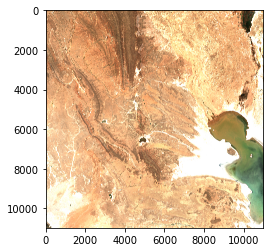

In [16]:
show(array)

In [18]:
array.shape

(3, 10980, 10980)

## Check image information 

In [17]:
print(kwds)

{'driver': 'JP2OpenJPEG', 'dtype': 'uint8', 'nodata': None, 'width': 10980, 'height': 10980, 'count': 3, 'crs': CRS.from_epsg(32719), 'transform': Affine(10.0, 0.0, 600000.0,
       0.0, -10.0, 8000020.0), 'blockxsize': 1024, 'blockysize': 1024, 'tiled': True, 'interleave': 'pixel'}


## Image manipulation

In [0]:
img_bright=tf.image.adjust_brightness(array,delta=0.5)
img_np = np.asarray(img_bright)
del img_bright

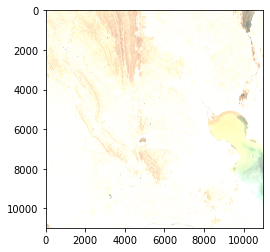

In [28]:
show(img_bright)

## Write image

In [0]:
kwds['driver'] = 'GTiff'
#kwds['dtype'] = 'unint8'
def write_image(input_image):
  with rasterio.open(os.path.join(path,'image_out.tif'), 'w', **kwds) as src:
    src.write(input_image)

In [0]:
write_image(img_np)

# Open the modified image and plot it 

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 10980, 'height': 10980, 'count': 3, 'crs': CRS.from_epsg(32719), 'transform': Affine(10.0, 0.0, 600000.0,
       0.0, -10.0, 8000020.0), 'blockxsize': 1024, 'blockysize': 1024, 'tiled': True, 'interleave': 'pixel'}


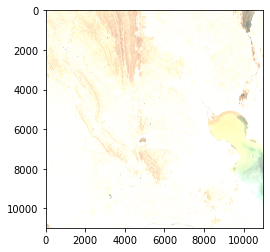

In [35]:
with rasterio.open(os.path.join(path,'image_out.tif'), 'r') as dataset:
    array0 = dataset.read()
    kwds = dataset.profile
print(kwds)
show(array0)